<a href="https://colab.research.google.com/github/mokselb/AD/blob/main/ADlab3(fully_connected_feed_forward_network_%2B_CNN_%2B_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Embedding, LSTM, Reshape
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv("breast-cancer.csv")
df.drop('id', axis=1, inplace = True)
df.rename(columns={'diagnosis' : 'target'}, inplace = True)
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.drop(['target'],axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=67)

Так як в нас є лише два результати в таргеті, то будемо використовувати сігмоїду в останньому шарі

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               7936      
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 139777 (546.00 KB)
Trainable params: 139

In [ ]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Accuracy(name="accuracy"),
]


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

In [ ]:
model.fit(X_train, y_train, epochs=14, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/14
41/41 [==============================] - 0s 6ms/step - loss: 0.0082 - fn: 1.0000 - fp: 1.0000 - tn: 250.0000 - tp: 157.0000 - precision: 0.9937 - recall: 0.9937 - accuracy: 0.9144 - val_loss: 2.1337 - val_fn: 3.0000 - val_fp: 0.0000e+00 - val_tn: 76.0000 - val_tp: 35.0000 - val_precision: 1.0000 - val_recall: 0.9211 - val_accuracy: 0.9123
Epoch 2/14
41/41 [==============================] - 0s 6ms/step - loss: 0.0100 - fn: 1.0000 - fp: 1.0000 - tn: 250.0000 - tp: 157.0000 - precision: 0.9937 - recall: 0.9937 - accuracy: 0.9120 - val_loss: 2.1361 - val_fn: 3.0000 - val_fp: 0.0000e+00 - val_tn: 76.0000 - val_tp: 35.0000 - val_precision: 1.0000 - val_recall: 0.9211 - val_accuracy: 0.9123
Epoch 3/14
41/41 [==============================] - 0s 4ms/step - loss: 0.0069 - fn: 0.0000e+00 - fp: 1.0000 - tn: 250.0000 - tp: 158.0000 - precision: 0.9937 - recall: 1.0000 - accuracy: 0.9071 - val_loss: 2.1302 - val_fn: 3.0000 - val_fp: 0.0000e+00 - val_tn: 76.0000 - val_tp: 35.0000 - val_pr

In [ ]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
predicted_labels = (predictions > 0.5).astype(int)
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.92      0.96        38

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Підібравши кількість епох та розмір батчів ми натренували нашу модель, і перевіривши її на тестових данних отримали досить хороший результат точності

Жоден з класифікаторів першої лаби не показував кращих результатів аніж наша нейронна мережа

In [ ]:
!pip install kaggle

In [ ]:
!unzip archive.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: cat_dog/dog.5499.jpg    
  inflating: cat_dog/dog.55.jpg      
  inflating: cat_dog/dog.550.jpg     
  inflating: cat_dog/dog.5500.jpg    
  inflating: cat_dog/dog.5501.jpg    
  inflating: cat_dog/dog.5502.jpg    
  inflating: cat_dog/dog.5503.jpg    
  inflating: cat_dog/dog.5504.jpg    
  inflating: cat_dog/dog.5505.jpg    
  inflating: cat_dog/dog.5506.jpg    
  inflating: cat_dog/dog.5507.jpg    
  inflating: cat_dog/dog.5508.jpg    
  inflating: cat_dog/dog.5509.jpg    
  inflating: cat_dog/dog.551.jpg     
  inflating: cat_dog/dog.5510.jpg    
  inflating: cat_dog/dog.5511.jpg    
  inflating: cat_dog/dog.5512.jpg    
  inflating: cat_dog/dog.5513.jpg    
  inflating: cat_dog/dog.5514.jpg    
  inflating: cat_dog/dog.5515.jpg    
  inflating: cat_dog/dog.5516.jpg    
  inflating: cat_dog/dog.5517.jpg    
  inflating: cat_dog/dog.5518.jpg    
  inflating: cat_dog/dog.5519.jpg    
  inflating: cat_dog

In [ ]:
df = pd.read_csv('cat_dog.csv')

In [ ]:
df.head

<bound method NDFrame.head of                image  labels
0      dog.11289.jpg       1
1      cat.10836.jpg       0
2       cat.7970.jpg       0
3       cat.2212.jpg       0
4       dog.2653.jpg       1
...              ...     ...
24995  dog.12201.jpg       1
24996   dog.2893.jpg       1
24997  cat.12267.jpg       0
24998   dog.4380.jpg       1
24999   cat.7962.jpg       0

[25000 rows x 2 columns]>

In [ ]:
df.rename(columns = {'labels' : 'target'}, inplace = True)
df.head

<bound method NDFrame.head of                image  target
0      dog.11289.jpg       1
1      cat.10836.jpg       0
2       cat.7970.jpg       0
3       cat.2212.jpg       0
4       dog.2653.jpg       1
...              ...     ...
24995  dog.12201.jpg       1
24996   dog.2893.jpg       1
24997  cat.12267.jpg       0
24998   dog.4380.jpg       1
24999   cat.7962.jpg       0

[25000 rows x 2 columns]>

In [ ]:
image_path = '/content/cat_dog/cat.10836.jpg'
img = cv2.imread(image_path)
img_height, img_width, _ = img.shape
print(f"Розмір зображення: {img_width} x {img_height}")

Розмір зображення: 500 x 370


In [ ]:
#df = df.sample(n=1500, random_state=67)
df.head

<bound method NDFrame.head of                image  target
19222  cat.10634.jpg       0
20603   cat.3801.jpg       0
16401   cat.7430.jpg       0
4127    dog.3759.jpg       1
4116    cat.2388.jpg       0
...              ...     ...
637     dog.1165.jpg       1
1629    dog.2261.jpg       1
19147   cat.2575.jpg       0
2939   cat.11252.jpg       0
6828    dog.9379.jpg       1

[1500 rows x 2 columns]>

In [ ]:
train_data, temp_data = train_test_split(df, test_size=0.3, random_state=67)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=67)

In [ ]:
train_data.head

<bound method NDFrame.head of               image  target
2610   dog.5112.jpg       1
9819   cat.9386.jpg       0
764    cat.4397.jpg       0
73     dog.1580.jpg       1
5824   cat.5582.jpg       0
...             ...     ...
13193  cat.8460.jpg       0
10247  cat.6526.jpg       0
24005  cat.1051.jpg       0
1738   dog.7283.jpg       1
21301  dog.6105.jpg       1

[17500 rows x 2 columns]>

In [ ]:
validation_data.head

<bound method NDFrame.head of                image  target
17695   cat.4362.jpg       0
24224  cat.11530.jpg       0
21525  cat.11005.jpg       0
278      dog.526.jpg       1
12943   dog.5648.jpg       1
...              ...     ...
11142   cat.8407.jpg       0
12686  cat.12386.jpg       0
18387   dog.9308.jpg       1
7499    cat.7676.jpg       0
18350   dog.5083.jpg       1

[3750 rows x 2 columns]>

In [ ]:
test_data.head

<bound method NDFrame.head of                image  target
17923  dog.11696.jpg       1
17333   cat.5973.jpg       0
7472    dog.2068.jpg       1
24017   cat.4250.jpg       0
8075    cat.5949.jpg       0
...              ...     ...
4109    dog.4621.jpg       1
23373   cat.4394.jpg       0
16666   cat.9034.jpg       0
6144    dog.2764.jpg       1
12605   cat.3136.jpg       0

[3750 rows x 2 columns]>

In [ ]:
def load_and_preprocess_data(data, image_directory, input_shape=(100, 100, 3)):
    images = []
    labels = []

    for index, row in data.iterrows():
        image_path = image_directory + '/' + row['image']
        img = load_img(image_path, target_size=input_shape)
        img_array = img_to_array(img)
        img_array /= 255.0

        images.append(img_array)
        labels.append(row['target'])

    return np.array(images), np.array(labels)

In [ ]:
image_directory = '/content/cat_dog'

In [ ]:
train_images, train_labels = load_and_preprocess_data(train_data, image_directory)
validation_images, validation_labels = load_and_preprocess_data(validation_data, image_directory)
test_images, test_labels = load_and_preprocess_data(test_data, image_directory)

In [ ]:
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

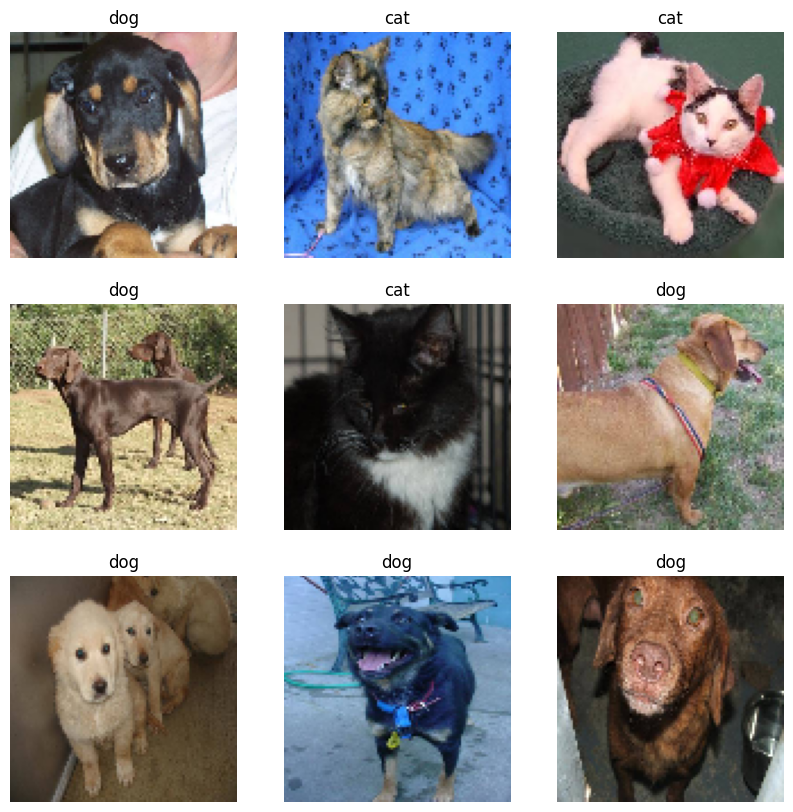

In [ ]:
class_names = ['cat', 'dog']
plot_images(train_images, train_labels, class_names)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)      

In [ ]:
model.fit(train_images, train_labels, epochs=35, batch_size=128, validation_data=(validation_images, validation_labels))

Epoch 1/35
137/137 [==============================] - 291s 2s/step - loss: 0.6771 - accuracy: 0.5633 - val_loss: 0.6472 - val_accuracy: 0.6445
Epoch 2/35
137/137 [==============================] - 295s 2s/step - loss: 0.6135 - accuracy: 0.6593 - val_loss: 0.5737 - val_accuracy: 0.7219
Epoch 3/35
137/137 [==============================] - 291s 2s/step - loss: 0.5482 - accuracy: 0.7206 - val_loss: 0.5442 - val_accuracy: 0.7221
Epoch 4/35
137/137 [==============================] - 293s 2s/step - loss: 0.5114 - accuracy: 0.7478 - val_loss: 0.4974 - val_accuracy: 0.7544
Epoch 5/35
137/137 [==============================] - 293s 2s/step - loss: 0.4842 - accuracy: 0.7696 - val_loss: 0.4739 - val_accuracy: 0.7800
Epoch 6/35
137/137 [==============================] - 290s 2s/step - loss: 0.4612 - accuracy: 0.7844 - val_loss: 0.4551 - val_accuracy: 0.7829
Epoch 7/35
137/137 [==============================] - 292s 2s/step - loss: 0.4462 - accuracy: 0.7929 - val_loss: 0.4425 - val_accuracy: 0.7989

Я спробував різні оптимізатори, різні гіпермараметри, додавав шари, додавав дропаути, змінював розмір батчу, збульшував кільість епох і отримував найкращу точність на валідаційних данних близько 87%, також відбувається перенавчання, як можемо побачити точність на тренувальних данних краща ніж на валідаційних

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2958162724971771
Test accuracy: 0.8754666447639465


Це не найкраща точність, можливо збільшення розміру картинок дало б кращий результат, але наявність обмеження пам'яті не дає змоги на повну все перевірити та протестувати

Перейдемо до 3 завдання з класифікацією текстових данних

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [168]:
text = pd.read_csv('Mental Health Dataset.csv')
text.drop('predicted', axis = 1, inplace = True)
text.rename(columns ={'intensity' : 'target'}, inplace = True)
text['posts'] = text['posts'].astype(str)
text['posts'] = text['posts'].apply(lambda x: re.sub(r'https?://\S+', '', x))
text['posts'] = text['posts'].apply(lambda x: re.sub(r'[@#]\S+', '', x))
text['posts'] = text['posts'].str.lower()
text['posts'] = text['posts'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
text['posts'] = text['posts'].apply(lambda x: re.sub(r'\d', '', x))
text['posts'] = text['posts'].apply(lambda x: re.sub(r'\s{2,}', ' ', x))
stop_words = stopwords.words('english')
text['posts'] = text['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

text.head

<bound method NDFrame.head of                                                    posts  target
0      know parent child syndrome hear child high ris...      -1
1      heart know future promise article regardless h...       0
2      mylefibrosis turn leukemia want stem cell tran...      -1
3      one health group subject wayne dyer leukemia c...       0
4      gmos link leukemia http nsnbc gmo link leukemi...       0
...                                                  ...     ...
10387  hey everyone year old male work eat pretty hea...      -1
10388  surgery stage colon cancer year ago cea level ...      -2
10389  doctor advise could remove abnormal polyp chri...       0
10390  year old father much past year really need try...       0
10391  bein bloody stool since last year start around...      -1

[10392 rows x 2 columns]>

In [ ]:
#text['posts'] = text['posts'].apply(lambda x: x[:100])

In [169]:
min_words_threshold = 300
text['nw'] = text['posts'].apply(lambda x: len(x))
text = text[text['nw'] >= min_words_threshold]
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(text['posts'])
X_sequences = tokenizer.texts_to_sequences(text['posts'])
x_padded = keras.preprocessing.sequence.pad_sequences(X_sequences, maxlen=500)

In [170]:
text['nw']

0        1102
1        2185
2        1307
3        1136
6        1870
         ... 
10381     408
10387    1133
10389     572
10390    1065
10391     785
Name: nw, Length: 7313, dtype: int64

In [171]:
len(x_padded[5])

500

Після того як ми підготували дані, нам необхідно розділити їх на тренувальні, валідаційні та тестові

In [172]:
y = text['target']
X_train, X_val, y_train, y_val = train_test_split(x_padded, y, test_size=0.30, random_state = 67)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 67)

In [173]:
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_val_one_hot = to_categorical(y_val, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

In [174]:
X_train.shape

(5119, 500)

In [175]:
X_val.shape

(1097, 500)

In [176]:
X_test.shape

(1097, 500)

In [181]:
emb_dim = 256

model = keras.Sequential()
model.add(Embedding(15000, emb_dim))
model.add(LSTM(256))
model.add(Dense(4, activation='softmax'))

In [182]:
model.compile(optimizer=Adam(learning_rate=0.00012), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [183]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, None, 256)         3840000   
                                                                 
 lstm_29 (LSTM)              (None, 256)               525312    
                                                                 
 dense_29 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 4366340 (16.66 MB)
Trainable params: 4366340 (16.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [184]:
model.fit(X_train, y_train_one_hot, epochs=8, batch_size=128, validation_data = (X_val, y_val_one_hot), shuffle = True, verbose = 1)

Epoch 1/8
40/40 [==============================] - 168s 4s/step - loss: 1.3096 - categorical_accuracy: 0.4378 - val_loss: 1.1838 - val_categorical_accuracy: 0.4303
Epoch 2/8
40/40 [==============================] - 162s 4s/step - loss: 1.1498 - categorical_accuracy: 0.4499 - val_loss: 1.1415 - val_categorical_accuracy: 0.4403
Epoch 3/8
40/40 [==============================] - 161s 4s/step - loss: 1.0456 - categorical_accuracy: 0.5319 - val_loss: 0.9989 - val_categorical_accuracy: 0.5725
Epoch 4/8
40/40 [==============================] - 162s 4s/step - loss: 0.9588 - categorical_accuracy: 0.5819 - val_loss: 0.9421 - val_categorical_accuracy: 0.5734
Epoch 5/8
40/40 [==============================] - 161s 4s/step - loss: 0.8097 - categorical_accuracy: 0.6613 - val_loss: 0.8517 - val_categorical_accuracy: 0.6481
Epoch 6/8
40/40 [==============================] - 161s 4s/step - loss: 0.7047 - categorical_accuracy: 0.7167 - val_loss: 0.7931 - val_categorical_accuracy: 0.6928
Epoch 7/8
40/40 

Спробувавши велику кількість різних параметрів, обмежуючи словник та кількість слів по різному, я не зміг досягти кращого результата ніж 68%-70% точності на валідаційних данних

In [185]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7706271409988403
Test accuracy: 0.6946216821670532


В порівнянні з деревом прийняття рішень, яке ми використовували разом з TF-IDF перетворенням, ми отримали кращу точність.